# FOPA Simulation Framework

## To do before you start
Welcome to the FOPA Simulation Framework <br>
Execute the next cell to ensure nice notebook formatting and to load the necessary libraries: <br>

 - waitingUtils: contains all needed FOPA waiting line specific simulation functionality
 - Counter from Collections: Enables bucketing needed to analyze the simulation output
 - Matplotlib: enables plotting results
 - Numpy: enables scientific computing
 - Pandas: enables data slicing and dicing

In [36]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important;}</style>"))
%load_ext autoreload
%autoreload 2

import WaitingUtils as wu
import pandas as pd
from collections import Counter
import matplotlib as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Context and Documentation
The BOPA waiting line simulation framework simulates arrival and service times and keeps track of the current state of the system. <br>
The framework keeps track of the state of the system at every arrival event. <br>
To be more precise, for every arrival (event), the framework will generate, calculate, and log: <br>
 - Draw the inter arrival time (the time between this and the previous arrival).
 - Calculate the actual arrival time (assuming that the process starts at $t=0$.
 - Calculate the service start time. I.e., the time that the service starts. This does not equal the arrival time if all service providers are occupied at arrival time (and the waiting room is occupied).
 - Calculate the waiting time.
 - Draw the service time.
 - Calculate the completion time.
 - Calculate the time spent in the system.
 - Calculate the time agent is available.
 
The analysis will ignore the first (configurable) number of simulations in order to exclude the warm-up dynamics of the system from the analysis. For the remaning number of simulations the attribute values defined above enable calculating parameters such as :
 
 - Total number of customer waiting.
 - Probability of waiting.
 - Average waiting time.
 - Maximum waiting time.
 - Quality server utilization.
 - Total waiting time.
 - Total simulation time.
 - Average number of customers in the queue.
 

# Single Agent Model

### Simulation Configuration Settings
The next cell enables you to set all relevant simulation configuration parameters <br>
The base case for this simulation is given below
 - Average (poisson) interarrival time: 3.75 (minutes)
 - Average (exponential) service time: 3 (minutes)
 - Time period: 1 (minute)
 - Number of customers (simulations): 1,000
 - Warm up phase duration (in units of number of simulations): 100


In [37]:
average_arrival_time = 3.75
average_service_time = 3
number_of_customer_simulated = 1000
warm_up_phase_duration = 100
agent_availability_time = 0
time_period = 1.0


### Running a Simulation 
In the cell below we pass all the required parameters into the run_simulation_single method which stages and runs the entire simulation and outputs all the simulated profits in a Python dictionary. This dictionary is wrapped into a Pandas Series object and transposed (switch columns and rows). The column headers, which reside on the first row, are assigned to be Dataframe headers. Finally, the first row, that contains the headers, is not displayed.<br>
The first 100 simulation instances after the warm up period ends are displayed.

In [38]:
simulation_output_single = pd.DataFrame(wu.run_simulation_single(average_arrival_time, 
                                                        average_service_time, 
                                                        time_period, 
                                                        number_of_customer_simulated,
                                                        warm_up_phase_duration,
                                                        agent_start_time = 0)).T
simulation_output_single.columns = simulation_output_single.iloc[0]
simulation_output_single = simulation_output_single.iloc[1:]
simulation_output_single.head()

,inter_arrival_time,arrival_time,service_start_time,waiting_time,service_time,completion_time,time_in_system,agent_available_time
100,2.00631,383.685,389.722,6.03675,4.21998,393.942,10.2567,393.942
101,0.0377006,383.723,393.942,10.219,3.98671,397.929,14.2057,397.929
102,5.03751,388.761,397.929,9.16823,0.693382,398.622,9.86161,398.622
103,2.86894,391.629,398.622,6.99267,3.29447,401.917,10.2871,401.917
104,2.16377,393.793,401.917,8.12337,2.06718,403.984,10.1905,403.984


### Analyze and Display the Result

In [39]:
# Calculate the probability that waiting time is longer than number_of_minutes
def probability_of_waiting(waiting_times, number_of_minutes):
    simulation_count = waiting_times.count()
    wait_time_count = waiting_times[waiting_times>number_of_minutes].count()
    probability_of_waiting = wait_time_count/simulation_count
    return probability_of_waiting

The mean waiting time equals 21.86
The max waiting time equals 92.88
The total waiting time equals 19,675.30
The total simulation duration equals 3,194.59
The total service time equals 2,775.49
The average number of customers in the queue equals 6.16
The quality agent utilization equals 0.87
The probability of having to wait equals 87.11%
The probability of having to wait over one minute equals 83.22%


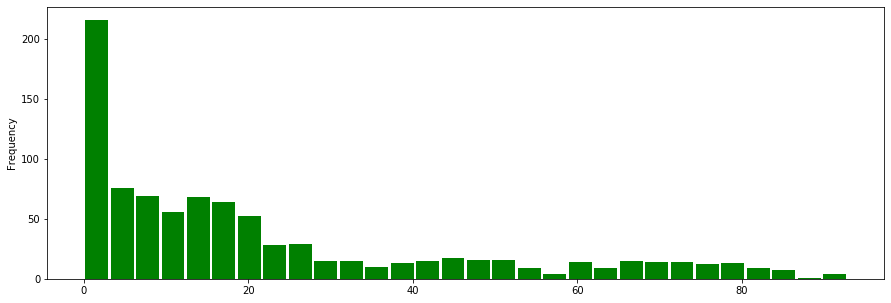

In [40]:
# Find the waiting_times we just simulated, find their min and max
waiting_times = simulation_output_single["waiting_time"]
waiting_time_mean = waiting_times.mean()
waiting_time_max = waiting_times.max()

# Calculate the sum of all the waiting time
total_waiting_time = waiting_times.sum()

# Calculate total time
total_simulation_time = simulation_output_single["completion_time"].iloc[-1] - simulation_output_single["completion_time"].iloc[0]

# Calculate total service time
total_service_time = simulation_output_single["service_time"].sum()

# Calculate every's average waiting time
average_in_queue = total_waiting_time / total_simulation_time

# Calculate the utilization rage
quality_agent_utilization = total_service_time/total_simulation_time

# Number of cumtomer who waits longer than one minute
number_of_customer_waiting_over_one_minute = simulation_output_single["waiting_time"][simulation_output_single["waiting_time"]>1].count()

# Calculate the probability of customer waits
waiting_probability = probability_of_waiting(waiting_times,0)

# Calculate the probability of customer waits longer than 1 minute
probability_of_waiting_over_one_minute = probability_of_waiting(waiting_times,1)

print("The mean waiting time equals " + '{:,.2f}'.format(waiting_time_mean))
print("The max waiting time equals " + '{:,.2f}'.format(waiting_time_max))
print("The total waiting time equals " + '{:,.2f}'.format(total_waiting_time))
print("The total simulation duration equals " + '{:,.2f}'.format(total_simulation_time))
print("The total service time equals " + '{:,.2f}'.format(total_service_time))
print("The average number of customers in the queue equals " + '{:,.2f}'.format(average_in_queue))
print("The quality agent utilization equals " + '{:,.2f}'.format(quality_agent_utilization))
print("The probability of having to wait equals " + "{:.2%}".format(waiting_probability))
print("The probability of having to wait over one minute equals " + "{:.2%}".format(probability_of_waiting_over_one_minute))
simulation_output_single["waiting_time"].plot.hist(grid = False, bins=30, color='green', zorder=2, rwidth=0.9, figsize=(15,5))



<br><br><br>


# Double Agents Model (2 agents)

### Simulation Configuration Settings
The next cell enables you to set all relevant simulation configuration parameters <br>
The base case for this simulation is given below
 - Average (poisson) interarrival time: 3.75 (minutes)
 - Average (exponential) service time: 3 (minutes)
 - Time period: 1 (minute)
 - Number of customers (simulations): 1,000
 - Warm up phase duration (in units of number of simulations): 100
 - Agent two availability time = 0

In [41]:
average_arrival_time = 3.75
average_service_time = 3
number_of_customer_simulated = 1000
warm_up_phase_duration = 100
agent_two_availability_time = 0 
time_period = 1

### Running a Simulation 
In the cell below we pass all the required parameters into the run_simulation_double method which stages and runs the entire simulation and outputs all the simulated profits in a Python dictionary. This dictionary is wrapped into a Pandas Series object and transposed (switch columns and rows). The column headers, which reside on the first row, are assigned to be Dataframe headers. Finally, the first row, that contains the headers, is not displayed.<br>
The first 100 simulation instances after the warm up period ends are displayed.

In [42]:
simulation_output_double = pd.DataFrame(wu.run_simulation_double(average_arrival_time, 
                                                        average_service_time, 
                                                        time_period, 
                                                        number_of_customer_simulated,
                                                        warm_up_phase_duration,
                                                        agent_two_start_time = 0)).T
simulation_output_double.columns = simulation_output_double.iloc[0]
simulation_output_double = simulation_output_double.iloc[1:]
simulation_output_double.head()

,inter_arrival_time,arrival_time,service_start_time,waiting_time,service_time,completion_time,time_in_system,agent_one_available,agent_two_available
100,10.1196,432.691,432.691,0,1.83343,434.524,1.83343,423.879,434.524
101,0.522912,433.214,433.214,0,2.41246,435.626,2.41246,435.626,434.524
102,4.77905,437.993,437.993,0,2.2699,440.263,2.2699,435.626,440.263
103,0.0526582,438.045,438.045,0,7.6254,445.671,7.6254,445.671,440.263
104,2.84632,440.892,440.892,0,1.64543,442.537,1.64543,445.671,442.537


### Analyze and Display the Result

In [43]:
def probability_of_waiting(waiting_times, number_of_minutes):
    simulation_count = waiting_times.count()
    wait_time_count = waiting_times[waiting_times>number_of_minutes].count()
    probability_of_waiting = wait_time_count/simulation_count
    return probability_of_waiting

The mean waiting time equals 0.56
The max waiting time equals 11.14
The total waiting time equals 501.95
The total simulation duration equals 3,306.58
The total service time equals 2,809.62
The average number of customers in the queue equals 0.15
The quality agent utilization equals 0.85
The probability of having to wait equals 25.22%
The probability of having to wait over one minute equals 16.89%


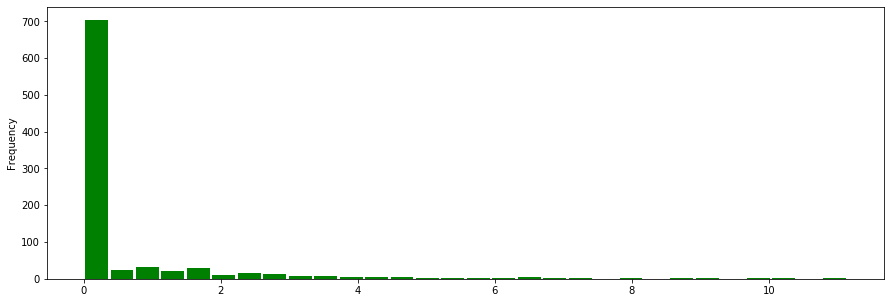

In [44]:
# Find the waiting_times we just simulated, find their min and max
waiting_times = simulation_output_double["waiting_time"]
waiting_time_mean = waiting_times.mean()
waiting_time_max = waiting_times.max()

# Calculate the sum of all the waiting time
total_waiting_time = waiting_times.sum()

# Calculate total time
total_simulation_time = simulation_output_double["completion_time"].iloc[-1] - simulation_output_double["completion_time"].iloc[0]

# Calculate total service time
total_service_time = simulation_output_double["service_time"].sum()

# Calculate every's average waiting time
average_in_queue = total_waiting_time / total_simulation_time

# Calculate the utilization rate
quality_agent_utilization = total_service_time/total_simulation_time

# Number of cumtomer who waits longer than one minute
number_of_customer_waiting_over_one_minute = simulation_output_double["waiting_time"][simulation_output_double["waiting_time"]>1].count()

# Calculate the probability of customer waits
waiting_probability = probability_of_waiting(waiting_times,0)

# Calculate the probability of customer waits longer than 1 minute
probability_of_waiting_over_one_minute = probability_of_waiting(waiting_times,1)
print("The mean waiting time equals " + '{:,.2f}'.format(waiting_time_mean))
print("The max waiting time equals " + '{:,.2f}'.format(waiting_time_max))
print("The total waiting time equals " + '{:,.2f}'.format(total_waiting_time))
print("The total simulation duration equals " + '{:,.2f}'.format(total_simulation_time))
print("The total service time equals " + '{:,.2f}'.format(total_service_time))
print("The average number of customers in the queue equals " + '{:,.2f}'.format(average_in_queue))
print("The quality agent utilization equals " + '{:,.2f}'.format(quality_agent_utilization))
print("The probability of having to wait equals " + "{:.2%}".format(waiting_probability))
print("The probability of having to wait over one minute equals " + "{:.2%}".format(probability_of_waiting_over_one_minute))
simulation_output_double["waiting_time"].plot.hist(grid = False, bins=30, color='green', zorder=2, rwidth=0.9, figsize=(15,5))



<br><br>

# Triple Agents Model (3 agents)

### Simulation Configuration Settings
The next cell enables you to set all relevant simulation configuration parameters <br>
The base case for this simulation is given below
 - Average (poisson) interarrival time: 3.75 (minutes)
 - Average (exponential) service time: 3 (minutes)
 - Time period: 1 (minute)
 - Number of customers (simulations): 1,000
 - Warm up phase duration (in units of number of simulations): 100
 - Agent two availability time = 0

In [45]:
average_arrival_time = 3.75
average_service_time = 3
number_of_customer_simulated = 1000
warm_up_phase_duration = 100
agent_tri_three_availability_time = 0
time_period = 1

### Running a Simulation 
In the cell below we pass all the required parameters into the run_simulation_triple method which stages and runs the entire simulation and outputs all the simulated profits in a Python dictionary. This dictionary is wrapped into a Pandas Series object and transposed (switch columns and rows). The column headers, which reside on the first row, are assigned to be Dataframe headers. Finally, the first row, that contains the headers, is not displayed.<br>
The first 100 simulation instances after the warm up period ends are displayed.

In [46]:
simulation_output_triple = pd.DataFrame(wu.run_simulation_triple(average_arrival_time, 
                                                        average_service_time, 
                                                        time_period, 
                                                        number_of_customer_simulated,
                                                        warm_up_phase_duration,
                                                        agent_tri_three_start_time = 0)).T
simulation_output_triple.columns = simulation_output_triple.iloc[0]
simulation_output_triple = simulation_output_triple.iloc[1:]
simulation_output_triple.head()

,inter_arrival_time,arrival_time,service_start_time,waiting_time,service_time,completion_time,time_in_system,agent_tri_one_available,agent_tri_two_available,agent_tri_three_available
100,4.66916,377.575,377.575,0,0.0600584,377.635,0.0600584,375.277,377.635,374.62
101,1.08966,378.664,378.664,0,1.98664,380.651,1.98664,375.277,377.635,380.651
102,10.1516,388.816,388.816,0,1.00174,389.818,1.00174,389.818,377.635,380.651
103,1.2077,390.024,390.024,0,7.03119,397.055,7.03119,389.818,397.055,380.651
104,1.69232,391.716,391.716,0,1.84832,393.564,1.84832,389.818,397.055,393.564


### Analyze and Display the Result

In [47]:
def probability_of_waiting(waiting_times, number_of_minutes):
    simulation_count = waiting_times.count()
    wait_time_count = waiting_times[waiting_times>number_of_minutes].count()
    probability_of_waiting = wait_time_count/simulation_count
    #print(wait_time_count)
    return probability_of_waiting

The mean waiting time equals 0.06
The max waiting time equals 3.33
The total waiting time equals 51.59
The total simulation duration equals 3,508.47
The total service time equals 2,721.95
The average number of customers in the queue equals 0.01
The quality agent utilization equals 0.78
The probability of having to wait equals 5.00%
The probability of having to wait over one minute equals 2.11%


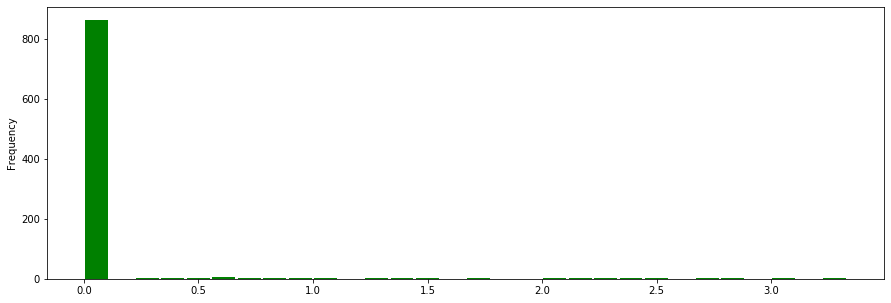

In [48]:
# Find the waiting_times we just simulated, find their min and max
waiting_times = simulation_output_triple["waiting_time"]
waiting_time_mean = waiting_times.mean()
waiting_time_max = waiting_times.max()

# Calculate the sum of all the waiting time
total_waiting_time = waiting_times.sum()

# Calculate total time
total_simulation_time = simulation_output_triple["completion_time"].iloc[-1] - simulation_output_triple["completion_time"].iloc[0]

# Calculate total service time
total_service_time = simulation_output_triple["service_time"].sum()

# Calculate every's average waiting time
average_in_queue = total_waiting_time / total_simulation_time

# Calculate the utilization rate
quality_agent_utilization = total_service_time/total_simulation_time

# Number of cumtomer who waits longer than one minute
number_of_customer_waiting_over_one_minute = simulation_output_triple["waiting_time"][simulation_output_triple["waiting_time"]>1].count()

# Calculate the probability of customer waits
waiting_probability = probability_of_waiting(waiting_times,0)

# Calculate the probability of customer waits longer than 1 minute
probability_of_waiting_over_one_minute = probability_of_waiting(waiting_times,1)
print("The mean waiting time equals " + '{:,.2f}'.format(waiting_time_mean))
print("The max waiting time equals " + '{:,.2f}'.format(waiting_time_max))
print("The total waiting time equals " + '{:,.2f}'.format(total_waiting_time))
print("The total simulation duration equals " + '{:,.2f}'.format(total_simulation_time))
print("The total service time equals " + '{:,.2f}'.format(total_service_time))
print("The average number of customers in the queue equals " + '{:,.2f}'.format(average_in_queue))
print("The quality agent utilization equals " + '{:,.2f}'.format(quality_agent_utilization))
print("The probability of having to wait equals " + "{:.2%}".format(waiting_probability))
print("The probability of having to wait over one minute equals " + "{:.2%}".format(probability_of_waiting_over_one_minute))
simulation_output_triple["waiting_time"].plot.hist(grid = False, bins=30, color='green', zorder=2, rwidth=0.9, figsize=(15,5))
